# Question 1 :What is the average annual crop yield of all various crop types for every country from 1990 to 2016?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# This line configures matplotlib to show figures embedded in the Jupyter notebook, 
# instead of opening a new window for each figure.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('yield.csv', encoding='latin1')

In [5]:
df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


In [7]:
# Filter the data for the years 1990 to 2016
filtered_data = df[(df['Year'] >= 1990) & (df['Year'] <= 2016)]

In [8]:
# Group the data by 'Area' (country) and 'Year'
grouped_data = filtered_data.groupby(['Area', 'Year'])

In [9]:
# Calculate the average yield for each group
average_yield = grouped_data['Value'].mean().reset_index()

In [10]:
# Rename the columns for clarity
average_yield.columns = ['Country', 'Year', 'Average Yield']

In [11]:
# Pivot the table to have years as columns and countries as rows
pivot_table = average_yield.pivot(index='Country', columns='Year', values='Average Yield')

In [12]:
print(pivot_table)

Year                                1990          1991       1992  \
Country                                                             
Afghanistan                 53885.500000  53198.750000  52280.750   
Albania                     29385.000000  28142.500000  30073.000   
Algeria                     29264.400000  34360.800000  41083.400   
American Samoa              31504.000000  53388.000000  53003.500   
Angola                      31793.666667  30884.833333  32196.500   
...                                  ...           ...        ...   
Wallis and Futuna Islands  102082.500000  97985.500000  98492.500   
Yemen                       48331.200000  50817.800000  55205.000   
Yugoslav SFR                36561.166667  45839.666667        NaN   
Zambia                      35873.250000  35487.750000  30535.125   
Zimbabwe                    43346.250000  42415.500000  38590.375   

Year                               1993          1994        1995  \
Country                          

In [13]:
pivot_table.to_csv('average_annual_crop_yield.csv')

In [14]:
average_yield = pd.read_csv('average_annual_crop_yield.csv', index_col='Country')

In [15]:
# Display the first few rows of the DataFrame
print(average_yield.head())

# Check for NaN values
print(average_yield.isna().sum())


                        1990          1991      1992          1993  \
Country                                                              
Afghanistan     53885.500000  53198.750000  52280.75  52763.000000   
Albania         29385.000000  28142.500000  30073.00  40478.200000   
Algeria         29264.400000  34360.800000  41083.40  40984.600000   
American Samoa  31504.000000  53388.000000  53003.50  52619.000000   
Angola          31793.666667  30884.833333  32196.50  36648.833333   

                        1994      1995          1996          1997      1998  \
Country                                                                        
Afghanistan     52964.750000  54145.25  53360.500000  54460.750000  55580.25   
Albania         34981.000000  45779.25  43990.750000  45755.000000  50748.00   
Algeria         32240.750000  38814.40  39496.800000  45095.000000  45165.00   
American Samoa  52234.500000  51850.00  51851.000000  64035.000000  73055.00   
Angola          42166.833333 

In [16]:
# Remove rows with any NaN values
cleaned_data = average_yield.dropna()

In [17]:
# Save the cleaned DataFrame to a new CSV file
cleaned_data.to_csv('cleaned_average_annual_crop_yield.csv')

In [18]:
# Load the cleaned pivot table CSV file into a DataFrame
cleaned_data = pd.read_csv('cleaned_average_annual_crop_yield.csv', index_col='Country')

In [19]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Afghanistan to Zimbabwe
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    172 non-null    float64
 1   1991    172 non-null    float64
 2   1992    172 non-null    float64
 3   1993    172 non-null    float64
 4   1994    172 non-null    float64
 5   1995    172 non-null    float64
 6   1996    172 non-null    float64
 7   1997    172 non-null    float64
 8   1998    172 non-null    float64
 9   1999    172 non-null    float64
 10  2000    172 non-null    float64
 11  2001    172 non-null    float64
 12  2002    172 non-null    float64
 13  2003    172 non-null    float64
 14  2004    172 non-null    float64
 15  2005    172 non-null    float64
 16  2006    172 non-null    float64
 17  2007    172 non-null    float64
 18  2008    172 non-null    float64
 19  2009    172 non-null    float64
 20  2010    172 non-null    float64
 21  2011    172 non-null    float

In [20]:
cleaned_data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,53885.500000,53198.750000,52280.75,52763.000000,52964.750000,54145.25,53360.500000,54460.750000,55580.25,53796.500000,...,56832.75,52687.75,53336.25,47002.000,40894.75,44001.00,49790.00,51395.5,49829.750,47537.75
Albania,29385.000000,28142.500000,30073.00,40478.200000,34981.000000,45779.25,43990.750000,45755.000000,50748.00,55392.500000,...,72782.50,76011.50,83092.25,88618.250,90725.00,93064.25,95233.75,94000.0,94170.500,93730.75
Algeria,29264.400000,34360.800000,41083.40,40984.600000,32240.750000,38814.40,39496.800000,45095.000000,45165.00,45512.000000,...,84145.60,73576.60,80542.40,71356.400,89933.20,114036.00,86749.00,83988.6,97849.800,128306.80
American Samoa,31504.000000,53388.000000,53003.50,52619.000000,52234.500000,51850.00,51851.000000,64035.000000,73055.00,52083.500000,...,44822.00,46109.00,45828.50,45619.500,45510.50,46571.50,47941.50,46569.0,45768.500,46623.50
Angola,31793.666667,30884.833333,32196.50,36648.833333,42166.833333,39810.50,40293.833333,38723.666667,39874.50,39211.666667,...,33441.00,41392.50,41789.25,42324.625,39548.75,31472.25,39410.25,39952.0,40306.875,38487.75


In [21]:
# Convert the DataFrame index to a list
countries = cleaned_data.index.tolist()

# Print the list of countries
for country in countries:
    print(country)

Afghanistan
Albania
Algeria
American Samoa
Angola
Antigua and Barbuda
Argentina
Australia
Austria
Bahamas
Bahrain
Bangladesh
Barbados
Belize
Benin
Bermuda
Bhutan
Bolivia (Plurinational State of)
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Chile
China
China, Hong Kong SAR
China, Taiwan Province of
China, mainland
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cuba
Cyprus
CÃ´te d'Ivoire
Democratic People's Republic of Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eswatini
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
Gabon
Gambia
Germany
Ghana
Greece
Grenada
Guadeloupe
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran (Islamic Republic of)
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kenya
Kuwait
Lao People's Democratic Republic
Lebanon
Lesoth

In [22]:
selected_countries = ['United States of America', 'China', 'India', 'Brazil', 'Australia']
data_to_plot = cleaned_data.loc[selected_countries].T

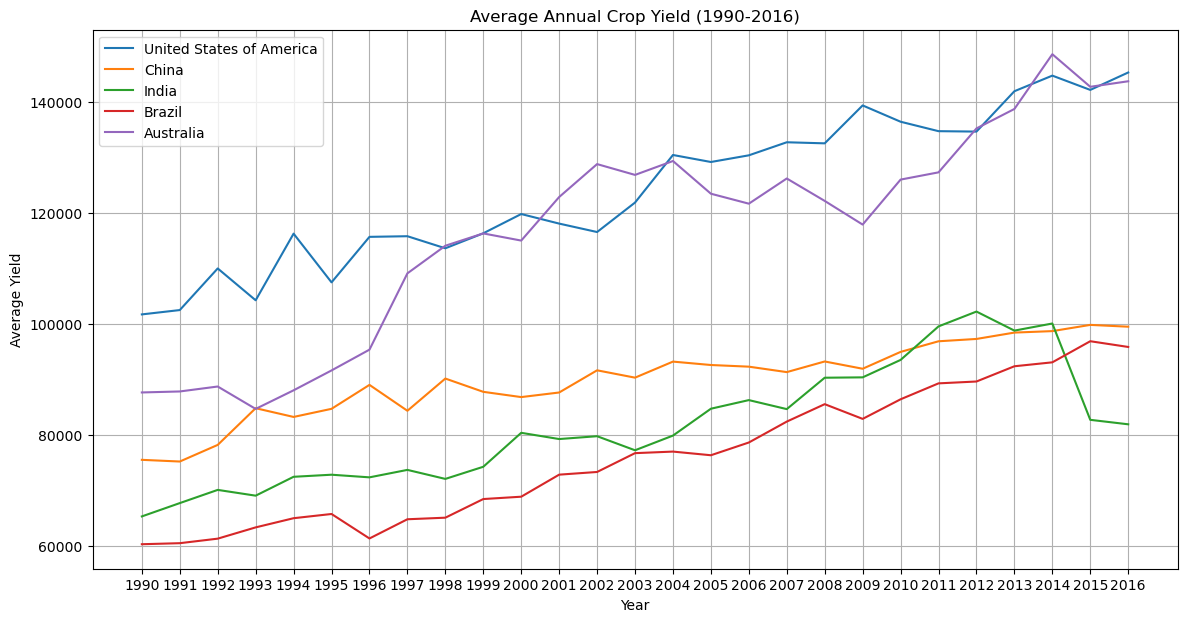

In [23]:
plt.figure(figsize=(14, 7))
for country in selected_countries:
    plt.plot(data_to_plot.index, data_to_plot[country], label=country)

plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.title('Average Annual Crop Yield (1990-2016)')
plt.legend()
plt.grid(True)
plt.show()

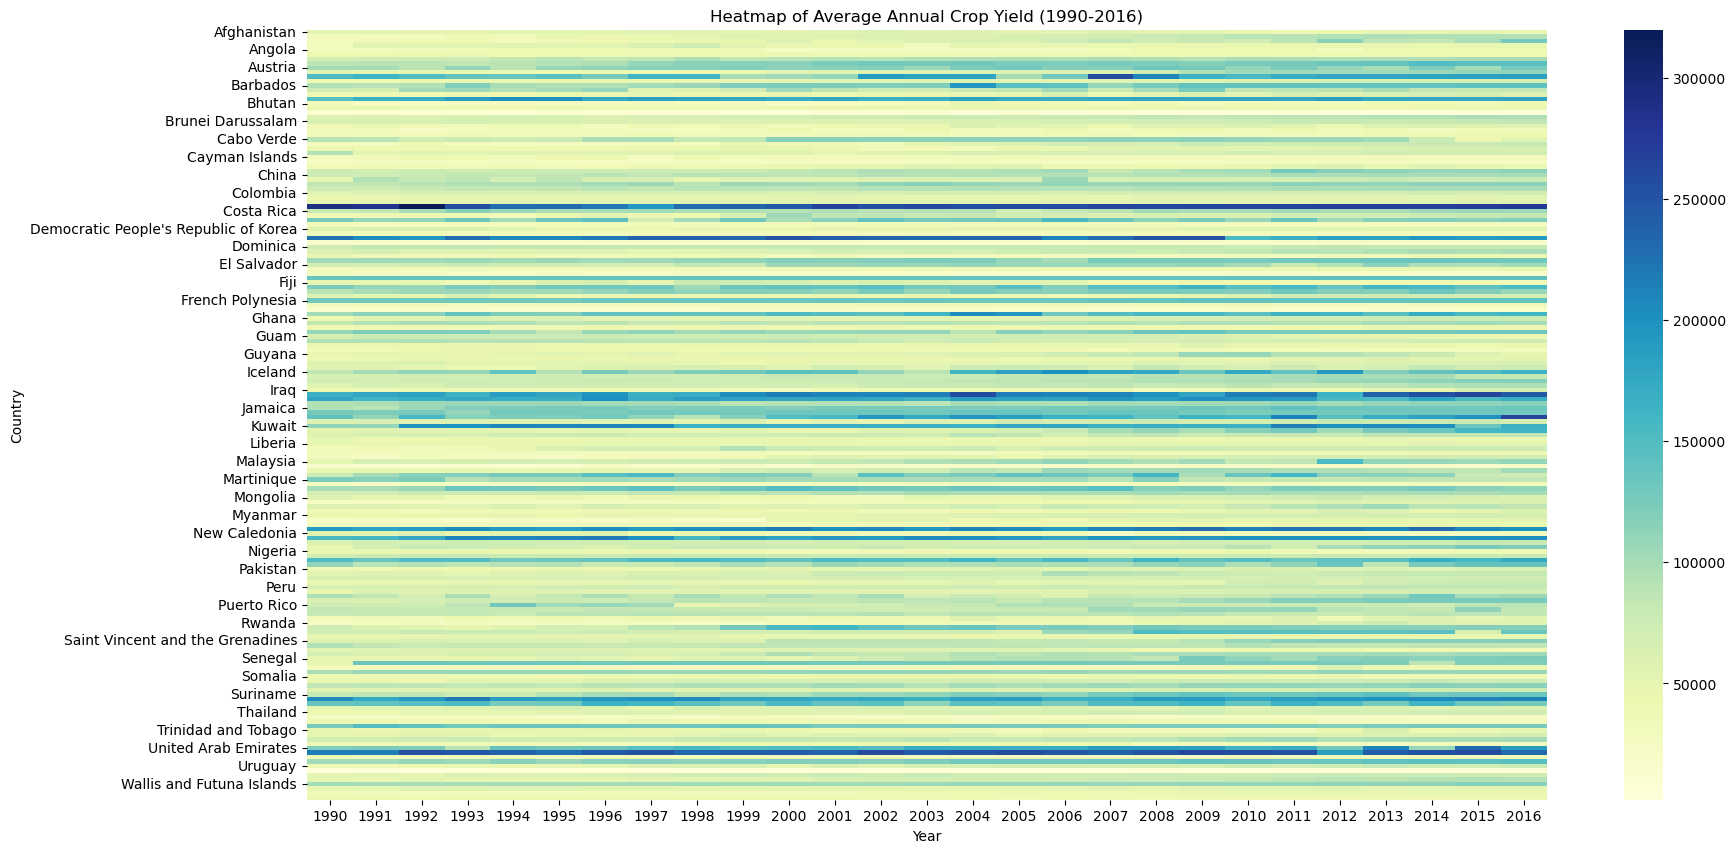

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(cleaned_data, cmap='YlGnBu', cbar=True)
plt.xlabel('Year')
plt.ylabel('Country')
plt.title('Heatmap of Average Annual Crop Yield (1990-2016)')
plt.show()

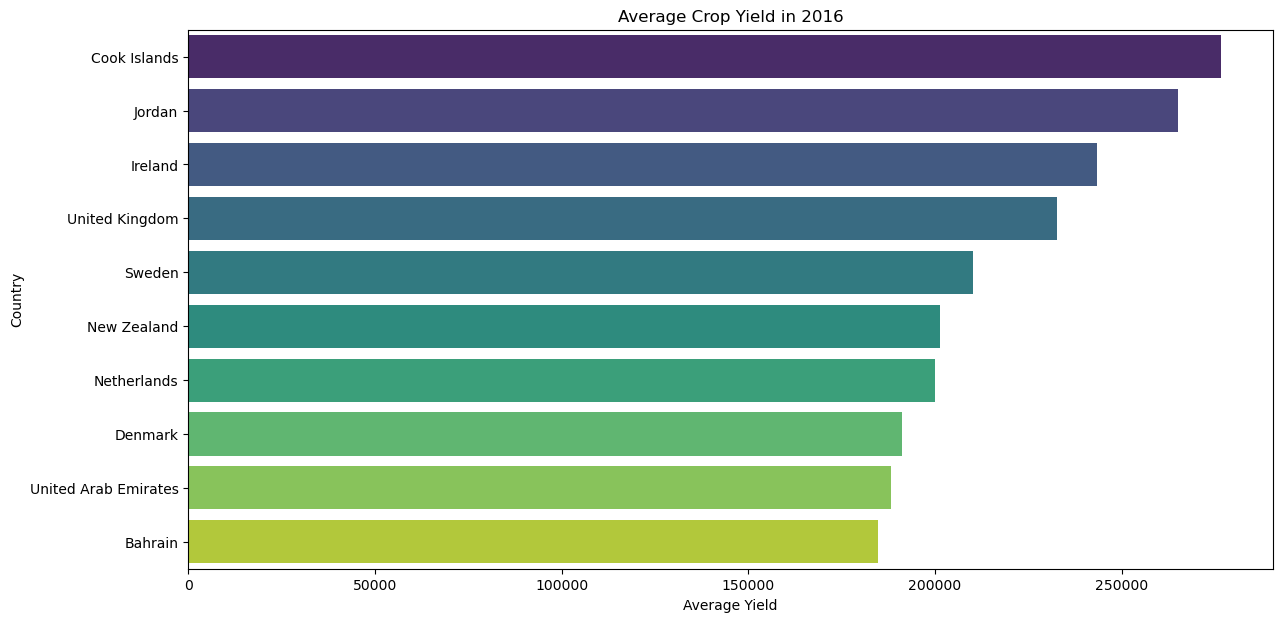

In [25]:
# Plot for a specific year, say 2016
year = '2016'
data_for_year = cleaned_data[year].dropna().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x=data_for_year.values, y=data_for_year.index, palette='viridis')
plt.xlabel('Average Yield')
plt.ylabel('Country')
plt.title(f'Average Crop Yield in {year}')
plt.show()

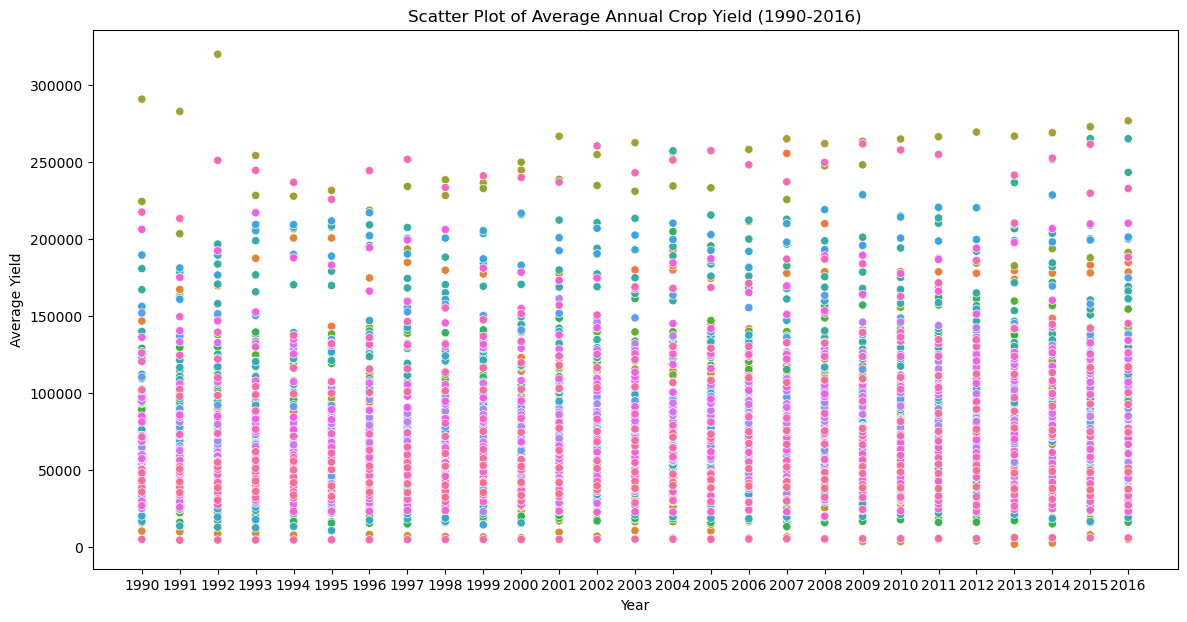

In [26]:
# Convert the DataFrame to a long format for scatter plot
long_data = cleaned_data.reset_index().melt(id_vars='Country', var_name='Year', value_name='Yield')

plt.figure(figsize=(14, 7))
sns.scatterplot(x='Year', y='Yield', hue='Country', data=long_data, legend=False)
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.title('Scatter Plot of Average Annual Crop Yield (1990-2016)')
plt.show()

# Question 2: How do trends in temperature and precipitation vary among different countries from 1990 to 2016 and how do they affect the crop yield?

In [27]:
#Cleaned and filter data based on year 
pd.options.display.max_rows = None
crop_yield = pd.read_csv('yield.csv') #Path may differ
crop_yield.drop(columns=['Domain Code', 'Domain', 'Area Code', 'Element', 'Element Code','Item Code','Year Code'], inplace = True)

#remedy discrepancies in the naming of countries
crop_yield.columns = crop_yield.columns.str.replace('Area', 'Name')
crop_yield['Name'].replace({
    'China, Taiwan Province of':'Taiwan',
    'China, mainland': 'China',
    'China, Hong Kong SAR': 'Hong Kong, SAR',
    'Bahamas':'The Bahamas',
    'Bolivia (Plurinational State of)':'Bolivia',
    'Czechia':'Czech Republic',
    'Gambia':'The Gambia' ,
    'Micronesia (Federated States of)':'Federated States of Micronesia',
    'Iran (Islamic Republic of)':'Islamic Republic of Iran',
    'Réunion': 'Reunion',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'United Republic of Tanzania': 'Tanzania' 
}, inplace = True)

crop_yield.columns = crop_yield.columns.str.replace('Value', 'Crop Yield')
filtered_cy = crop_yield[(crop_yield.Year >= 1990) & (crop_yield.Year <= 2016)]

In [28]:
#save cleaned data into new csv
filtered_cy.to_csv('Q2filtered_cy.csv')

In [29]:
rf1 = pd.read_excel('Precipitation_1950-2014.xlsx')
rf2 = pd.read_excel('Precipitation_2015-2100.xlsx')

#merge two rf data together
merged_rf = rf1.merge(rf2, on = ['code','name'])

#remedy discrepancies in the naming of countries
merged_rf.loc[(merged_rf['code'] == 'REU') & (merged_rf['name'] == 'France'), 'name'] = 'Reunion'
merged_rf.loc[(merged_rf['code'] == 'GLP') & (merged_rf['name'] == 'France'), 'name'] = 'Guadeloupe'
merged_rf.loc[(merged_rf['code'] == 'GUF') & (merged_rf['name'] == 'France'), 'name'] = 'French Guiana'
merged_rf.loc[(merged_rf['code'] == 'MTQ') & (merged_rf['name'] == 'France'), 'name'] = 'Martinique'
merged_rf.loc[(merged_rf['code'] == 'MYT') & (merged_rf['name'] == 'France'), 'name'] = 'Mayotte'
merged_rf.loc[(merged_rf['code'] == 'TWN') & (merged_rf['name'] == 'China'), 'name'] = 'Taiwan'
merged_rf['name'].replace({
    'French Polynesia (Fr.)': 'French Polynesia',
    'American Samoa (U.S.)': 'American Samoa',
    'Bermuda (U.K.)' :'Bermuda',
    'Cayman Islands (U.K.)': 'Cayman Islands',
    'Cook Islands (N.Z.)': 'Cook Islands',
    'D. P. R. of Korea': "Democratic People's Republic of Korea",
    'Arab Republic of Egypt': 'Egypt',
    'Faroe Islands (Den.)': 'Faroe Islands',
    'Guam (U.S.)':'Guam', 
    'Montserrat (U.K.)' :'Montserrat',
    'Moldova': 'Republic of Moldova',
    'Niue (N.Z.)': 'Niue',
    'New Caledonia (Fr.)': 'New Caledonia',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Türkiye': 'Turkey',
    'Puerto Rico (U.S.)':'Puerto Rico',
    'Viet Nam': 'Vietnam',
    'Republic of Yemen': 'Yemen',
    'Slovak Republic': 'Slovakia' ,
    'Wallis and Futuna (Fr.)':'Wallis and Futuna Islands',
    'R. B. de Venezuela': 'Venezuela',
    'São Tomé and Príncipe': 'Sao Tome and Principe'
}, inplace = True)

#drop irrelevant columns and replace column names
merged_rf.drop('code', axis = 1, inplace=True)
merged_rf.columns = merged_rf.columns.str.replace('-07', '')
merged_rf.columns = merged_rf.columns.str.replace('name', 'Name')

country = ['Name']
year = merged_rf.columns.difference(country) #takes every column except for country(name and code)

#id_vars will remain the same while the value_vars now would become the value in the 'Year' column
rf = pd.melt(merged_rf, id_vars = country, value_vars = year, 
                  var_name = 'Year', value_name = 'Precipitation')

rf['Year'] = rf['Year'].astype(int)

filtered_rf = rf[(rf.Year >= 1990) & (rf.Year <= 2016)]

In [30]:
#save into new csv file
filtered_rf.to_csv('Q2filtered_rf.csv')

In [31]:
temp1 = pd.read_excel('Surface Air Temperature_1950-2014.xlsx')
temp2 = pd.read_excel('Surface Air Temp_2015-2100.xlsx')

merged_temp = temp1.merge(temp2, on = ['code','name'])

#remedy discrepancies in the naming of countries
merged_temp.loc[(merged_temp['code'] == 'REU') & (merged_temp['name'] == 'France'), 'name'] = 'Reunion'
merged_temp.loc[(merged_temp['code'] == 'GLP') & (merged_temp['name'] == 'France'), 'name'] = 'Guadeloupe'
merged_temp.loc[(merged_temp['code'] == 'GUF') & (merged_temp['name'] == 'France'), 'name'] = 'French Guiana'
merged_temp.loc[(merged_temp['code'] == 'MTQ') & (merged_temp['name'] == 'France'), 'name'] = 'Martinique'
merged_temp.loc[(merged_temp['code'] == 'MYT') & (merged_temp['name'] == 'France'), 'name'] = 'Mayotte'
merged_temp.loc[(merged_temp['code'] == 'TWN') & (merged_temp['name'] == 'China'), 'name'] = 'Taiwan'
merged_temp['name'].replace({
    'French Polynesia (Fr.)': 'French Polynesia',
    'American Samoa (U.S.)': 'American Samoa',
    'Bermuda (U.K.)' :'Bermuda',
    'Cayman Islands (U.K.)': 'Cayman Islands',
    'Cook Islands (N.Z.)': 'Cook Islands',
    'D. P. R. of Korea': "Democratic People's Republic of Korea",
    'Arab Republic of Egypt': 'Egypt',
    'Faroe Islands (Den.)': 'Faroe Islands',
    'Guam (U.S.)':'Guam', 
    'Montserrat (U.K.)' :'Montserrat',
    'Moldova': 'Republic of Moldova',
    'Niue (N.Z.)': 'Niue',
    'New Caledonia (Fr.)': 'New Caledonia',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Türkiye': 'Turkey',
    'Puerto Rico (U.S.)':'Puerto Rico',
    'Viet Nam': 'Vietnam',
    'Republic of Yemen': 'Yemen',
    'Slovak Republic': 'Slovakia' ,
    'Wallis and Futuna (Fr.)':'Wallis and Futuna Islands',
    'R. B. de Venezuela': 'Venezuela',
    'São Tomé and Príncipe': 'Sao Tome and Principe'
}, inplace = True)
#drop irrelevant columns and replace column names
merged_temp.drop('code', axis = 1, inplace=True)
merged_temp.columns = merged_temp.columns.str.replace('-07', '')
merged_temp.columns = merged_temp.columns.str.replace('name', 'Name')
year = merged_temp.columns.difference(country)


temp = pd.melt(merged_temp, id_vars = country, value_vars = year,
               var_name = 'Year', value_name = 'Temperature')

temp['Year'] = temp['Year'].astype(int)
filtered_temp = temp[(temp.Year >= 1990) & (temp.Year <= 2016)]

In [32]:
#save into new csv file
filtered_temp.to_csv('Q2filtered_temp.csv')

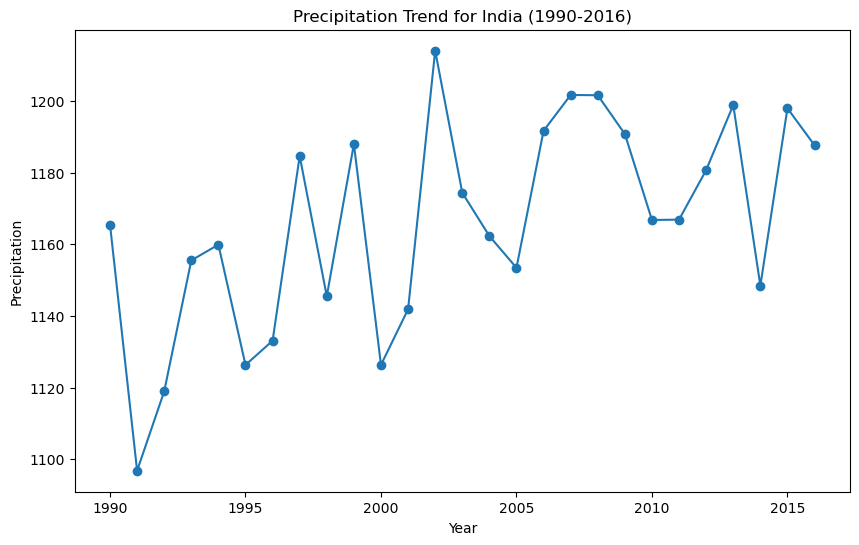

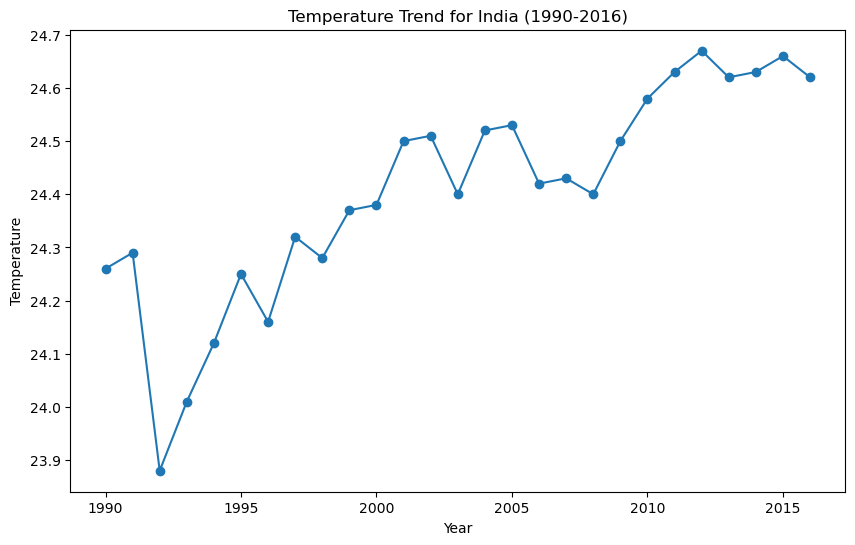

In [33]:
#visualise trend
cleaned_rf = pd.read_csv('Q2filtered_rf.csv')
cleaned_temp = pd.read_csv('Q2filtered_temp.csv')
def precipitation_trend(country_name):
    country_data = cleaned_rf[cleaned_rf['Name'] == country_name]

    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['Precipitation'], marker='o')
    plt.title(f'Precipitation Trend for {country_name} (1990-2016)')
    plt.xlabel('Year')
    plt.ylabel('Precipitation')
    plt.show()

def temp_trend(country_name):
    country_data = cleaned_temp[cleaned_temp['Name'] == country_name]

    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['Temperature'], marker='o')
    plt.title(f'Temperature Trend for {country_name} (1990-2016)')
    plt.xlabel('Year')
    plt.ylabel('Temperature')
    plt.show()


#plot trend based on country
precipitation_trend('India') 
temp_trend('India')

In [34]:
cleaned_cy = pd.read_csv('Q2filtered_cy.csv')
merged_data = cleaned_cy.merge(cleaned_rf, on = ['Name', 'Year'])
merged_data = merged_data.merge(filtered_temp, on = ['Name', 'Year'])

In [35]:
merged_data.to_csv('Q2merged_rf_temp_crop data.csv')

Available crop types in India:
1. Cassava
2. Maize
3. Potatoes
4. Rice, paddy
5. Sorghum
6. Soybeans
7. Sweet potatoes
8. Wheat


Enter number of choice to compare:  8


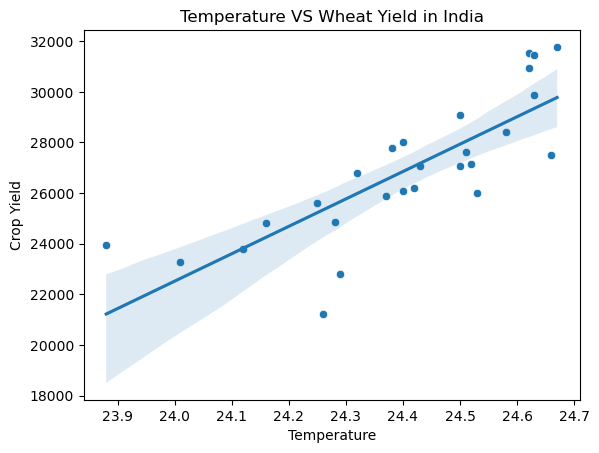

In [36]:
#crop_temp_scatter('India', 'Wheat')
cleaned_data = pd.read_csv('Q2merged_rf_temp_crop data.csv')
def crop_temp_scatter(country_name):
    country_data = cleaned_data[cleaned_data['Name'] == country_name]
    crop_available = country_data['Item'].unique()
    print(f"Available crop types in {country_name}:")
    for i, crop in enumerate(crop_available, 1):
        print(f"{i}. {crop}")
    choice = int(input("Enter number of choice to compare: ")) - 1
    selected_crop = crop_available[choice]
    crop_data = country_data[country_data['Item'] == selected_crop]
    ct_s = sns.scatterplot(x='Temperature', y='Crop Yield', data=crop_data)
    ct_s.set_title(f'Temperature VS {selected_crop} Yield in {country_name}')
    sns.regplot(x='Temperature', y='Crop Yield', data=crop_data, scatter=False, ax=ct_s)
    plt.show()
crop_temp_scatter('India')

Available crop types in India:
1. Cassava
2. Maize
3. Potatoes
4. Rice, paddy
5. Sorghum
6. Soybeans
7. Sweet potatoes
8. Wheat


Enter number of choice to compare:  3


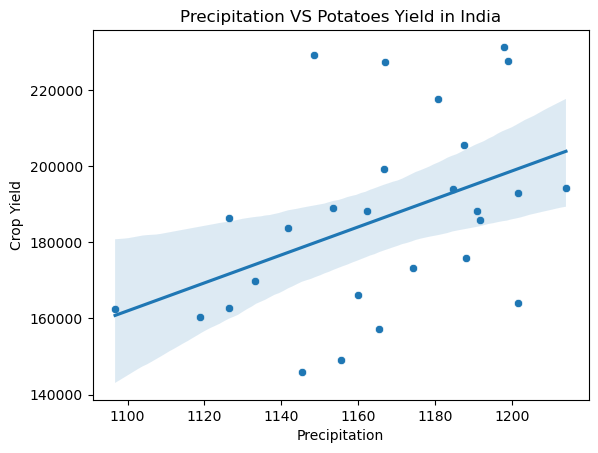

In [37]:
def crop_rf_scatter(country_name):
    country_data = cleaned_data[cleaned_data['Name'] == country_name]
    crop_available = country_data['Item'].unique()
    print(f"Available crop types in {country_name}:")
    for i, crop in enumerate(crop_available, 1):
        print(f"{i}. {crop}")
    choice = int(input("Enter number of choice to compare: ")) - 1
    selected_crop = crop_available[choice]
    crop_data = country_data[country_data['Item'] == selected_crop]
    crf_s = sns.scatterplot(x='Precipitation', y='Crop Yield', data=crop_data)
    crf_s.set_title(f'Precipitation VS {selected_crop} Yield in {country_name}')
    sns.regplot(x='Precipitation', y='Crop Yield', data=crop_data, scatter=False, ax=crf_s)
    plt.show()

crop_rf_scatter('India')

# Question 3: Does an increase in pesticide or fertiliser use cause an increase in crop yields, and does this causal relationship differ by country? 

In [ ]:
import pandas as pd

# Load the datasets
fertilizer_data = pd.read_csv('cereal-crop-yield-vs-fertilizer-application.csv')
pesticide_data = pd.read_csv('pesticides.csv')
yield_data = pd.read_csv('yield.csv')

# Cleaning Fertilizer Data
def clean_fertilizer_data(data):
    # Extract and rename relevant columns
    data_cleaned = data[['Entity', 'Year', 
                         'Cereals | 00001717 || Yield | 005419 || tonnes per hectare', 
                         'Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare']].copy()
    data_cleaned.columns = ['Country', 'Year', 'Cereal Yield (tonnes/ha)', 'Nitrogen Fertilizer Use (kg/ha)']
    
    # Remove rows with missing values
    data_cleaned = data_cleaned.dropna()
    
    # Convert columns to numeric
    data_cleaned['Cereal Yield (tonnes/ha)'] = pd.to_numeric(data_cleaned['Cereal Yield (tonnes/ha)'])
    data_cleaned['Nitrogen Fertilizer Use (kg/ha)'] = pd.to_numeric(data_cleaned['Nitrogen Fertilizer Use (kg/ha)'])
    
    # Remove duplicates
    data_cleaned = data_cleaned.drop_duplicates()
    
    return data_cleaned

# Cleaning Pesticide Data
def clean_pesticide_data(yield_data, pesticide_data):
    # Ensure the necessary columns are present in the pesticide dataset
    pesticide_data = pesticide_data.rename(columns={'Value': 'Pesticide Use (tonnes)'})
    
    # Ensure the necessary columns are present in the yield dataset
    yield_data = yield_data.rename(columns={'Value': 'Crop Yield (hg/ha)'})
    
    # Merge datasets
    merged_data = pd.merge(yield_data, pesticide_data, left_on=['Area', 'Year'], right_on=['Area', 'Year'])
    
    # Remove rows with missing values
    merged_data = merged_data.dropna()
    
    # Convert columns to numeric
    merged_data['Crop Yield (hg/ha)'] = pd.to_numeric(merged_data['Crop Yield (hg/ha)'])
    merged_data['Pesticide Use (tonnes)'] = pd.to_numeric(merged_data['Pesticide Use (tonnes)'])
    
    # Remove duplicates
    merged_data = merged_data.drop_duplicates()
    
    return merged_data

# Cleaned datasets
cleaned_fertilizer_data = clean_fertilizer_data(fertilizer_data)
cleaned_pesticide_data = clean_pesticide_data(yield_data, pesticide_data)

# Save cleaned data (optional)
cleaned_fertilizer_data.to_csv('cleaned_fertilizer_data.csv', index=False)
cleaned_pesticide_data.to_csv('cleaned_pesticide_data.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Function to plot the graph for a specific area in pesticide dataset
def plot_pesticide_data(area_name, data):
    if area_name not in data['Area'].unique():
        print(f"Area '{area_name}' not found in the dataset.")
        return
    
    area_data = data[data['Area'] == area_name]
    
    # Create a figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)
    
    # Boxplot for Pesticide Use
    sns.boxplot(ax=axes[0], x=area_data['Pesticide Use (tonnes)'])
    axes[0].set_title(f'Pesticide Use in {area_name}')
    axes[0].set_xlabel('Pesticide Use (tonnes)')
    
    # Boxplot for Crop Yield
    sns.boxplot(ax=axes[1], x=area_data['Crop Yield (hg/ha)'])
    axes[1].set_title(f'Crop Yield in {area_name}')
    axes[1].set_xlabel('Crop Yield (hg/ha)')
    
    # Scatter plot for the relationship between pesticide use and crop yields
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(area_data['Pesticide Use (tonnes)'], area_data['Crop Yield (hg/ha)'], label='Data points')
    ax.set_title(f'Relationship between Pesticide Use and Crop Yields in {area_name}')
    ax.set_xlabel('Pesticide Use (tonnes)')
    ax.set_ylabel('Crop Yield (hg/ha)')
    
    # Linear regression
    X = area_data['Pesticide Use (tonnes)'].values.reshape(-1, 1)
    Y = area_data['Crop Yield (hg/ha)'].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, Y)
    Y_pred = reg.predict(X)
    
    ax.plot(X, Y_pred, color='red', linewidth=2, label='Linear regression')
    ax.legend()
    
    plt.show()

# Load the dataset
data = pd.read_csv('cleaned_pesticide_data.csv')

# Prompt the user to enter an area name
area_name = input("Enter the name of the country to display the graph: ")
plot_pesticide_data(area_name, data)


# Question 4: What is the future crop yields based on current and historical data on pesticide use, temperature, and precipitation? 